In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

sdf = spark.read.csv("Files/Drug_Consumption_Quantified.csv", header=True, inferSchema=True)
sdf.head(5)

df = sdf.toPandas()


target_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 
               'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 
               'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
               'Mushrooms', 'Nicotine', 'VSA']

for col in target_cols:
    df[col] = df[col].str.replace('CL', '').astype(int)


# X and targets y
X = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
        'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]

#remove "CL" prefixes (CL0, CL1 >> 0, 1)
df['Cannabis'] = df['Cannabis'].astype(str).str.replace('CL', '').astype(int)
df['Coke']     = df['Coke'].astype(str).str.replace('CL', '').astype(int)

y_cannabis = df['Cannabis']
y_coke = df['Coke']


# Train and test splits
X_train_coke, X_test_coke, y_train_coke, y_test_coke = train_test_split(X, y_coke, test_size=0.2, random_state=42)


StatementMeta(, 5c8dd685-2924-42ef-8720-c8ba94a4788c, 3, Finished, Available, Finished)

StatementMeta(, 5c8dd685-2924-42ef-8720-c8ba94a4788c, 4, Finished, Available, Finished)

n_estimators=100: accuracy=0.586
n_estimators=200: accuracy=0.573
n_estimators=300: accuracy=0.592
n_estimators=400: accuracy=0.599
n_estimators=500: accuracy=0.586
n_estimators=750: accuracy=0.586
n_estimators=1000: accuracy=0.584


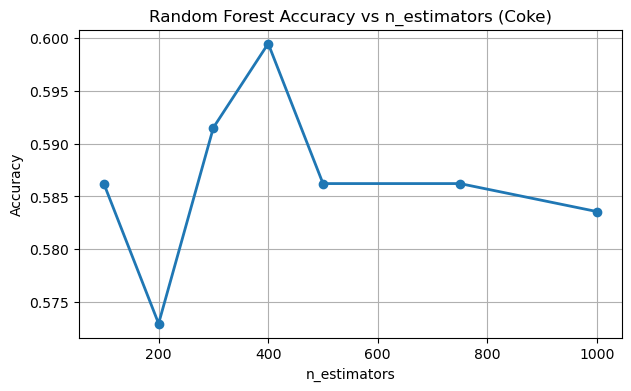

In [2]:
# Perform a simple manual optimization for one of the default parameters (with 7 different values) 
# Random Forest Classifier model. Plot the obtained accuracy as a function of the chosen parameter.


n_values = [100, 200, 300, 400, 500, 750 , 1000]
accuracies = []

for n in n_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_coke, y_train_coke)
    y_pred_coke = rf.predict(X_test_coke)
    acc = accuracy_score(y_test_coke, y_pred_coke)
    accuracies.append(acc)

# Results by matching two arrays
for n, acc in zip(n_values, accuracies): 
    print(f"n_estimators={n}: accuracy={acc:.3f}")

# Accuracy graphic
plt.figure(figsize=(7,4))
plt.plot(n_values, accuracies, marker='o', linestyle='-', linewidth=2)
plt.title("Random Forest Accuracy vs n_estimators (Coke)")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()